In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate


In [2]:
df1= pd.read_csv('/Users/marcomartinese/Downloads/04.order_status.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')

In [3]:
df1= df1[['order_id','customer_id']]

In [4]:
df1.head()

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c


In [5]:
df2= pd.read_csv('/Users/marcomartinese/Downloads/07.product_reviews.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')

In [6]:
df2.head()

,order_id,product_id,review_score,review_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,4,22/09/2018 10:57
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,5,15/05/2018 11:34
2,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,5,15/08/2019 16:39
3,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,5,03/03/2018 10:54
4,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,5,29/12/2018 02:40


In [7]:
df = df1.merge(df2, on='order_id', how='left')

In [8]:
df.head()

,order_id,customer_id,product_id,review_score,review_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,5.0,12/10/2018 03:43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,5.0,08/08/2019 18:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,5.0,22/08/2019 19:07
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,4.0,05/12/2018 19:21
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,5.0,18/02/2019 13:02


## Number of review score for total customers

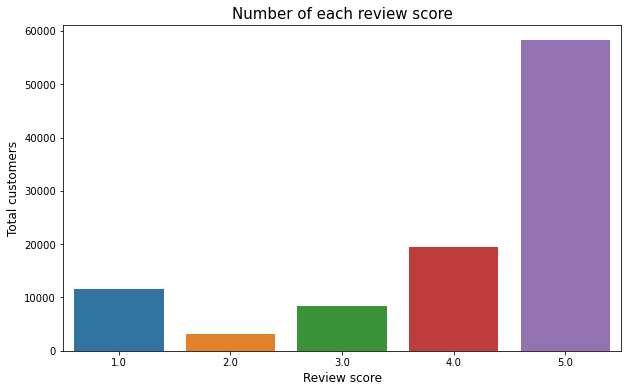

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='review_score', data=df)
plt.xlabel('Review score', fontsize=12)
plt.ylabel('Total customers', fontsize= 12)
plt.title('Number of each review score', fontsize= 15)
plt.show()

In [10]:
product_metadata= pd.read_csv('/Users/marcomartinese/Downloads/08.products.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')

In [11]:
product_metadata.head()

,product_id,product_category_name,product_weight_gr,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity
0,1e9e8ef04dbcff4541ed26657ea517e5,fragrance,225.0,16.0,10.0,14.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,fabric,1000.0,30.0,18.0,20.0,1.0
2,96bd76ec8810374ed1b65e291975717f,sport outdoors,154.0,18.0,9.0,15.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,kids,371.0,26.0,4.0,26.0,1.0
4,9dc1a7de274444849c219cff195d0b71,home accessories,625.0,20.0,17.0,13.0,4.0


In [12]:
product_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              32951 non-null  object 
 1   product_category_name   32341 non-null  object 
 2   product_weight_gr       32949 non-null  float64
 3   product_length_cm       32949 non-null  float64
 4   product_height_cm       32949 non-null  float64
 5   product_width_cm        32949 non-null  float64
 6   product_photo_quantity  32341 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [13]:
product_metadata= product_metadata.dropna()

In [14]:
df= df.dropna()

In [15]:
df.tail()

,order_id,customer_id,product_id,review_score,review_date
103097,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,5.0,23/03/2018 11:02
103098,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,f1d4ce8c6dd66c47bbaa8c6781c2a923,5.0,02/03/2019 17:50
103099,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,b80910977a37536adeddd63663f916ad,3.0,22/09/2018 23:10
103100,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,d1c427060a0f73f6b889a5c7c61f2ac4,5.0,27/01/2019 09:16
103101,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,006619bbed68b000c8ba3f8725d5409e,5.0,17/03/2019 16:33


In [16]:
df['review_score']= df['review_score'].astype(int)

In [17]:
df.tail()

,order_id,customer_id,product_id,review_score,review_date
103097,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,ac35486adb7b02598c182c2ff2e05254,5,23/03/2018 11:02
103098,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,f1d4ce8c6dd66c47bbaa8c6781c2a923,5,02/03/2019 17:50
103099,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,b80910977a37536adeddd63663f916ad,3,22/09/2018 23:10
103100,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,d1c427060a0f73f6b889a5c7c61f2ac4,5,27/01/2019 09:16
103101,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,006619bbed68b000c8ba3f8725d5409e,5,17/03/2019 16:33


## Create a Surprise Dataset
In order to train recommender systems with Surprise, we need to create a Dataset object. A Surprise Dataset object is a dataset that contains the following fields:

The customer IDs

The product IDs (in this case the IDs for each product)

The corresponding review score (usually on a scale such as 1–5)

In [18]:
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['customer_id', 'product_id', 'review_score']], reader)

## Training and Cross-Validating a Simple SVD Model
We can train and cross-validate a model that performs SVD (singular value decomposition) in order to build a recommendation system in just a few lines of code. SVD is a popular matrix factorization algorithm that can be used for recommender systems.

In the case of our product recommendation system, the SVD algorithm will represent the review score matrix as a product of matrices representing the product factors and customer factors respectively. 

In [19]:
from surprise import SVD
from surprise.model_selection import cross_validate
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3575  1.3501  1.3484  1.3520  0.0040  
MAE (testset)     1.0636  1.0611  1.0608  1.0618  0.0012  
Fit time          1.99    1.98    1.97    1.98    0.01    
Test time         0.13    0.12    0.18    0.14    0.03    


{'test_rmse': array([1.35752448, 1.35009021, 1.34838633]),
 'test_mae': array([1.06360025, 1.061099  , 1.06084382]),
 'fit_time': (1.9909162521362305, 1.9757671356201172, 1.9710729122161865),
 'test_time': (0.1257038116455078, 0.12125325202941895, 0.18387293815612793)}

We can also train the model on the entire dataset using the fit method after converting the dataset for cross-validation into a Surprise Trainset object using the build_full_trainset method.

In [20]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


## Generating Rating Predictions
Now that we have a trained SVD model, we can use it to predict the review score a customer would assign to a product given an ID for the customer (UID) and an ID for the product (IID). 

The predict method returns the Prediction shown below, which contains a field called est that indicates the estimated product rating for this specific customer.

In [21]:
svd.predict(uid= '39bd1228ee8140590ac3aca26f2dfe00', iid='a1b71017a84f92fd8da4aeefba108a24')

Prediction(uid='39bd1228ee8140590ac3aca26f2dfe00', iid='a1b71017a84f92fd8da4aeefba108a24', r_ui=None, est=4.140905208405667, details={'was_impossible': False})

## Generating product Recommendations

Based on the output above, we can see that the model predicted that this specific customer would give a four-star review score (roughly) to the product corresponding to an IID of 'a1b71017a84f92fd8da4aeefba108a24'. 

The model doesn’t directly recommend products, but we can use this review score prediction utility to identify what products a customer would likely enjoy, which allows us to justify recommending them to a customer.

In [23]:
import difflib
import random

def get_product_id(product_category, metadata):
    
    existing_titles = list(metadata['product_category_name'].values)
    closest_titles = difflib.get_close_matches(product_category, existing_titles)
    product_id = metadata[metadata['product_category_name'] == closest_titles[0]]['product_id'].values[0]
    return product_id

def get_product_info(product_id, metadata):
    
    product_info = metadata[metadata['product_id'] == product_id][['product_id', 'product_category_name','product_weight_gr','product_length_cm','product_height_cm','product_width_cm','product_photo_quantity']]
    return product_info.to_dict(orient='records')

def predict_review(user_id, product_category, model, metadata):
    
    product_id = get_product_id(product_category, metadata)
    review_prediction = model.predict(uid=user_id, iid=product_id)
    return review_prediction.est

def generate_recommendation(user_id, model, metadata, thresh=4):
    
    product_categories = list(metadata['product_category_name'].values)
    random.shuffle(product_categories)
    
    for product_category in product_categories:
        rating = predict_review(user_id, product_category, model, metadata)
        if rating >= thresh:
            product_id = get_product_id(product_category, metadata)
            return get_product_info(product_id, metadata)

The generate_recommendation function generates a product recommendation for a customer by iterating through the 
shuffled list of product id and predicting the customer ratings for each id until it finds a product with a rating 
at or above the specified threshold that qualifies it for being recommended to a customer. 

Shuffling the product ids at the beginning adds some randomness to the product recommendation.

In [30]:
generate_recommendation('1fca14ff2861355f6e5f14306ff977a7', svd, product_metadata)

[{'product_id': '22937a73f92a33040ab4e2540355a5d8',
  'product_category_name': 'fashion & shoes',
  'product_weight_gr': 100.0,
  'product_length_cm': 16.0,
  'product_height_cm': 5.0,
  'product_width_cm': 11.0,
  'product_photo_quantity': 3.0}]

Based on the output above, we can see that the function returns a dictionary with metadata about the product that was recommended. Running this function multiple times will produce multiple product recommendations. 

## Visualizing the Book Factors Using t-SNE

We can visualize the similarity between products based on the product factor matrix.

This matrix has too many dimensions for us to visualize intuitively, but we can use the t-SNE (t-Distributed Stochastic Neighbors Embedding) dimensionality reduction technique to represent each product as a two-dimensional point in space.

In [142]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=3, random_state=1)
products_embedding = tsne.fit_transform(svd.qi)
projection = pd.DataFrame(columns=['x', 'y'], data=products_embedding)
projection['product_id'] = product_metadata['product_id']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 32541 samples in 0.004s...
[t-SNE] Computed neighbors for 32541 samples in 34.887s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32541
[t-SNE] Computed conditional probabilities for sample 2000 / 32541
[t-SNE] Computed conditional probabilities for sample 3000 / 32541
[t-SNE] Computed conditional probabilities for sample 4000 / 32541
[t-SNE] Computed conditional probabilities for sample 5000 / 32541
[t-SNE] Computed conditional probabilities for sample 6000 / 32541
[t-SNE] Computed conditional probabilities for sample 7000 / 32541
[t-SNE] Computed conditional probabilities for sample 8000 / 32541
[t-SNE] Computed conditional probabilities for sample 9000 / 32541
[t-SNE] Computed conditional probabilities for sample 10000 / 32541
[t-SNE] Computed conditional probabilities for sample 11000 / 32541
[t-SNE] Computed conditional probabilities for sample 12000 / 32541
[t-SNE] Computed conditional probabilities for sa

After creating this data frame with two-dimensional points for each product,we used Plotly to create a visualization with each point corresponding to a product in the original dataset.

In [143]:
projection['product_id']= pd.factorize(projection.product_id)[0]

In [144]:
import plotly.express as px

fig = px.scatter(
    projection, x='x', y='y'
)
fig.show()

We can explain this distribution:

Some products may be generally popular among a wide range of audiences and thus correspond to points in the center of this scatterplot.

Other products may fall into very specific categories that are popular among specific audiences. These products may correspond to points away from the center of the plot.

### Visualizing Specific Products (first 100)

In [145]:
product_metadata['product_id']= pd.factorize(product_metadata.product_id)[0]

In [148]:
fig = px.scatter(projection, x=projection['x'][:100], y=projection['y'][:100], size=product_metadata['product_id'][:100])
fig.show()

This visualization allows us to see the similarities between different products. 

Products located closer to each other tend to perform similarly when it comes to ratings provided by similar customers.